# TRAFFIC SIGN RECOGNITION GERMAN DATASET

## INDICE
 0. CARGA DE DATOS
 1. MODELO
 2. VISUALIZACIÓN DE LOS PESOS
 3. CONFUSSION MATRIX
 4. PORCENTAJE DE ACIERTOS

## CARGA DE DATOS

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import csv
import math

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    labels = []
    images = []
    #print(directories)
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    
    images32 = [skimage.transform.resize(image, (32, 32))for image in images]
    
    labels2=np.array(labels)
    images2=np.array(images32)
    
    #print(label_dir)
    return images2, labels2

In [3]:
train_data_dir = ".\\data\\Training"            
X_train_orig, Y_train_orig = load_data(train_data_dir)
#print(Y_train_orig)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
print("ARRAY DE IMÁGENES TRAIN")
print("Tipo de objeto Python: ",type(X_train_orig))
print("Dimensiones del array: ", X_train_orig.shape)
print("Número de imágenes totales: ",len(X_train_orig))
print("Dimensiones de la primera imagen: ", X_train_orig[0].shape)
print("Parámetros RGB del primer pixel: ", X_train_orig[0][0][0])

ARRAY DE IMÁGENES TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209, 32, 32, 3)
Número de imágenes totales:  39209
Dimensiones de la primera imagen:  (32, 32, 3)
Parámetros RGB del primer pixel:  [0.27157054 0.28243336 0.28967525]


In [5]:
print("ARRAY DE LABELS TRAIN")
print("Tipo de objeto Python: " , type(Y_train_orig))
print("Dimensiones del array: ", Y_train_orig.shape)
print("Número de imágenes totales: ", len(Y_train_orig))
print("Número de clases totales: ", len(set(Y_train_orig)))
print(Y_train_orig)

ARRAY DE LABELS TRAIN
Tipo de objeto Python:  <class 'numpy.ndarray'>
Dimensiones del array:  (39209,)
Número de imágenes totales:  39209
Número de clases totales:  43
[ 0  0  0 ... 42 42 42]


In [6]:
def load_test_data (data_dir):
    labels  = []
    labels2 =[]
    images = []
    
    with open('GT-final_test.csv', 'r') as f:
      reader = csv.reader(f)
      labels = list(reader)
    #print(labels)
    for d in range(1,len(labels)):
        labels2.append(int(labels[d][0]))
    #print(len(labels))
    
    file_names = [os.path.join(data_dir, f) 
                  for f in os.listdir(data_dir) if f.endswith(".ppm")]
    for f in file_names:
        images.append(skimage.data.imread(f))
        
    images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
    
    labels3=np.array(labels2)
    images2=np.array(images32)
    
    return images2,labels3

In [7]:
test_data_dir = ".\\data\\Testing" 
X_test_orig, Y_test_orig = load_test_data(test_data_dir)

D:\ANACONDA\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [8]:
print("ARRAY DE LABELS TEST")
print("Tipo de objeto Python: " , type(Y_test_orig))
print("Número de imágenes totales: ", len(Y_test_orig))
print("Número de clases totales: ", len(set(Y_test_orig)))
print(Y_test_orig)

ARRAY DE LABELS TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630
Número de clases totales:  43
[16  1 38 ...  6  7 10]


In [9]:
print("ARRAY DE IMÁGENES TEST")
print("Tipo de objeto Python: ",type(X_test_orig))
print("Número de imágenes totales: ",len(X_test_orig))
X_test_orig

ARRAY DE IMÁGENES TEST
Tipo de objeto Python:  <class 'numpy.ndarray'>
Número de imágenes totales:  12630


array([[[[0.4549843 , 0.54658969, 0.6838848 ],
         [0.45357498, 0.53868528, 0.66966912],
         [0.4647729 , 0.54081457, 0.67437002],
         ...,
         [0.38254634, 0.44929726, 0.56131281],
         [0.3828259 , 0.47408471, 0.57749502],
         [0.33509306, 0.41173407, 0.51217065]],

        [[0.45132698, 0.55571768, 0.69029756],
         [0.45122549, 0.54932407, 0.68259612],
         [0.46014476, 0.55438496, 0.68508349],
         ...,
         [0.46841682, 0.55971584, 0.69185049],
         [0.47089652, 0.5531901 , 0.67880476],
         [0.46970933, 0.54571078, 0.66891276]],

        [[0.46017157, 0.55349839, 0.68211933],
         [0.45984796, 0.55784314, 0.68727214],
         [0.44613971, 0.54880323, 0.67671569],
         ...,
         [0.47129098, 0.56360294, 0.70407284],
         [0.47940219, 0.5646178 , 0.70075253],
         [0.46918467, 0.55906863, 0.69485869]],

        ...,

        [[0.4588063 , 0.53687577, 0.65637255],
         [0.45053424, 0.52677696, 0.64282322]

## Model 1: One Fully-Connected Layer - Accuracy: 60-70%  
Vamos a utilizar una neural ned igual a la del Belgium Dataset, en este caso con 43 nodos dado que el número de categorias es igual a 43.

In [10]:
class Model1():
    #***BASIC MODEL WITH 1 FC LAYER***
    def __init__(self):
        self.graph = tf.Graph()
        with self.graph.as_default():
            #Placeholders
            self.images=tf.placeholder(tf.float32,(None,32, 32,3), name='images')
            self.labels=tf.placeholder(tf.int32, [None], name='labels')
            #Flatten input
            self.images_flat=tf.contrib.layers.flatten(self.images)
            #Fully connected layer
            self.logits=tf.contrib.layers.fully_connected(self.images_flat,43, tf.nn.relu)
            print(self.logits)
            #Convert one hot vector to label indexes (int)
            self.predicted_labels=tf.argmax(self.logits,1)
            #Loss
            self.loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.logits, labels=self.labels))
            #Training
            self.train=tf.train.AdamOptimizer(learning_rate=0.001).minimize(self.loss)
            #Initialization
            self.init=tf.global_variables_initializer()
            #Create session
            self.session=tf.Session()
            #Run Initialization
            self.session.run(self.init)
        

In [11]:
def train(model, images, labels, test_images, test_labels, train_count, imprimir=True):
    #Training loop
    costs=[]
    for i in range(train_count):
        #print(images.shape)
        #print(labels.shape)
        if i % 20 == 0:
            lossvalue = evaluate(model, test_images, test_labels, i, imprimir)
            costs.append(lossvalue)
        
        model.session.run(model.train,{
            model.images:images,
            model.labels:labels})
            
    #Final evaluation
    lossvalue=evaluate(model, test_images, test_labels,i)
    costs.append(lossvalue)
    
    if imprimir == True:
        # plot the cost    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.show()

#TODO: evaluate training loss and accuracy

def evaluate(model, images, labels, step, imprimir=True):
    #Run predictions against the full test set
    #print(images.shape)
    #print(labels.shape)
    predicted, loss = model.session.run([model.predicted_labels, model.loss],
                                       {model.images: images, model.labels:labels})
    #Calculate accuracy and print
    accuracy=np.sum(labels == predicted)/labels.shape[0]
    if imprimir == True:
        print("{:4}, Loss: {:.3f}  Test accuracy: {:.3f}".format(step,loss, accuracy))
    return loss    


Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
   0, Loss: 3.850  Test accuracy: 0.026
  20, Loss: 3.329  Test accuracy: 0.245
  40, Loss: 3.101  Test accuracy: 0.318
  60, Loss: 2.967  Test accuracy: 0.351
  80, Loss: 2.869  Test accuracy: 0.373
 100, Loss: 2.798  Test accuracy: 0.390
 120, Loss: 2.741  Test accuracy: 0.403
 140, Loss: 2.694  Test accuracy: 0.414
 160, Loss: 2.655  Test accuracy: 0.421
 180, Loss: 2.622  Test accuracy: 0.429
 200, Loss: 2.592  Test accuracy: 0.435
 220, Loss: 2.566  Test accuracy: 0.441
 240, Loss: 2.543  Test accuracy: 0.446
 260, Loss: 2.522  Test accuracy: 0.449
 280, Loss: 2.503  Test accuracy: 0.452
 300, Loss: 2.486  Test accuracy: 0.455
 320, Loss: 2.470  Test accuracy: 0.459
 340, Loss: 2.455  Test accuracy: 0.461
 360, Loss: 2.442  Test accuracy: 0.463
 380, Loss: 2.429  Test accuracy: 0.466
 400, Loss: 2.417  Test accuracy: 0.468
 420, Loss: 2.407  Test accuracy: 0.470
 440, Loss: 2.396  Test accuracy: 0.471
 460, Loss: 2.387

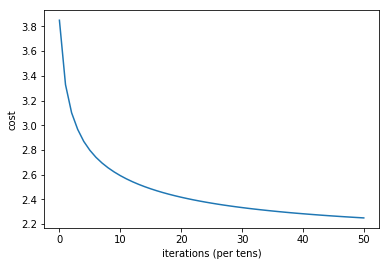

In [13]:
m1 = Model1()
train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 1000, imprimir=True)

In [12]:
for i in range(5):
    m1 = Model1()
    train(m1, X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, 500 , imprimir=False)

D:\ANACONDA\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 2.004  Test accuracy: 0.573
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.758  Test accuracy: 0.645
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 2.141  Test accuracy: 0.530
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 2.207  Test accuracy: 0.539
Tensor("fully_connected/Relu:0", shape=(?, 43), dtype=float32)
 499, Loss: 1.890  Test accuracy: 0.600


### VISUALIZACIÓN DE LOS PESOS

In [60]:
def normalize(image):
    return (image-image.min())/(image.max()-image.min())

def display_images(images, titles=None, cols=5, interpolation=None):
    """ 
    images: A list of images. It can be either:
        + A list of Numpy arrays. Each array represents an image.
        + A list of lists of numpy arrays. In this casse, the images in the inner
          the inner lists are concatentated to make one image.
    
    """
    
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images)/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(11,11 * height_ratio))
    i=1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize = 9)
        plt.imshow(image, cmap="Greys_r", interpolation=interpolation)
        i += 1

In [15]:
#label_exemplars= [X_train_orig[np.where(Y_train_orig == l)][:][:] for l in range(62)]
label_exemplars =[]
for i in range(43):
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_exemplars.append(X_train_orig[w])
            break
#label_counts = [np.count_nonzero(X_train_orig ==l ) for l in range(62)]
label_counts = []
for i in range(43):
    label_counts.append(0)
    for w in range(len(Y_train_orig)):
        if Y_train_orig[w] == i:
            label_counts[i] = label_counts[i]+1

In [16]:
# Loop trough the graph and print the names and shapes of all trainable variables
with m1.graph.as_default():
    for v in tf.trainable_variables():
        print(v.name, v.get_shape())

fully_connected/weights:0 (3072, 43)
fully_connected/biases:0 (43,)


In [17]:
#Get the values of the weight and bias variables.
m1_weights=m1.session.run("fully_connected/weights:0")
m1_biases=m1.session.run("fully_connected/biases:0")
print("weights shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_weights.shape, m1_weights.min(), m1_weights.max()))
print("biases shape: {!s:10}    min: {:.4f}    max: {:.4f}".format(m1_biases.shape, m1_biases.min(), m1_biases.max()))

weights shape: (3072, 43)    min: -0.1982    max: 0.2059
biases shape: (43,)         min: -0.0331    max: 0.1936


In [18]:
def display_weights(weights, limit):
    titles= ["Label {}  ({})".format(l,c) for l, c in enumerate(label_counts)]
    images = list(zip(label_exemplars, weights.T.reshape(-1, 32, 32,3)))
    display_images(images[:limit], titles)

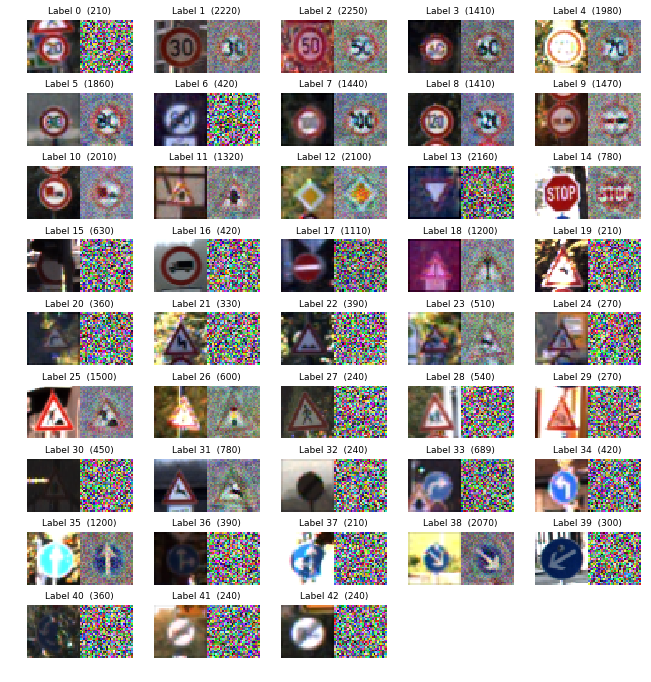

In [19]:
# Display weights of the first 30 labels
display_weights(m1_weights, 62)

Vamos a echar un vistazo a los histogramas

In [20]:
def display_histograms(weights, limit):
    plt.figure(figsize=(100,100))
    for i in range(limit):
        plt.subplot(25,3,i+1)
        w = weights[:,i]
        plt.title("Label {}".format(i), fontsize=8)
        plt.tick_params(labelsize=6)
        plt.yticks([])
        plt.xticks([w.min(),w.max()])
        plt.hist(w, bins=62)
    plt.tight_layout()

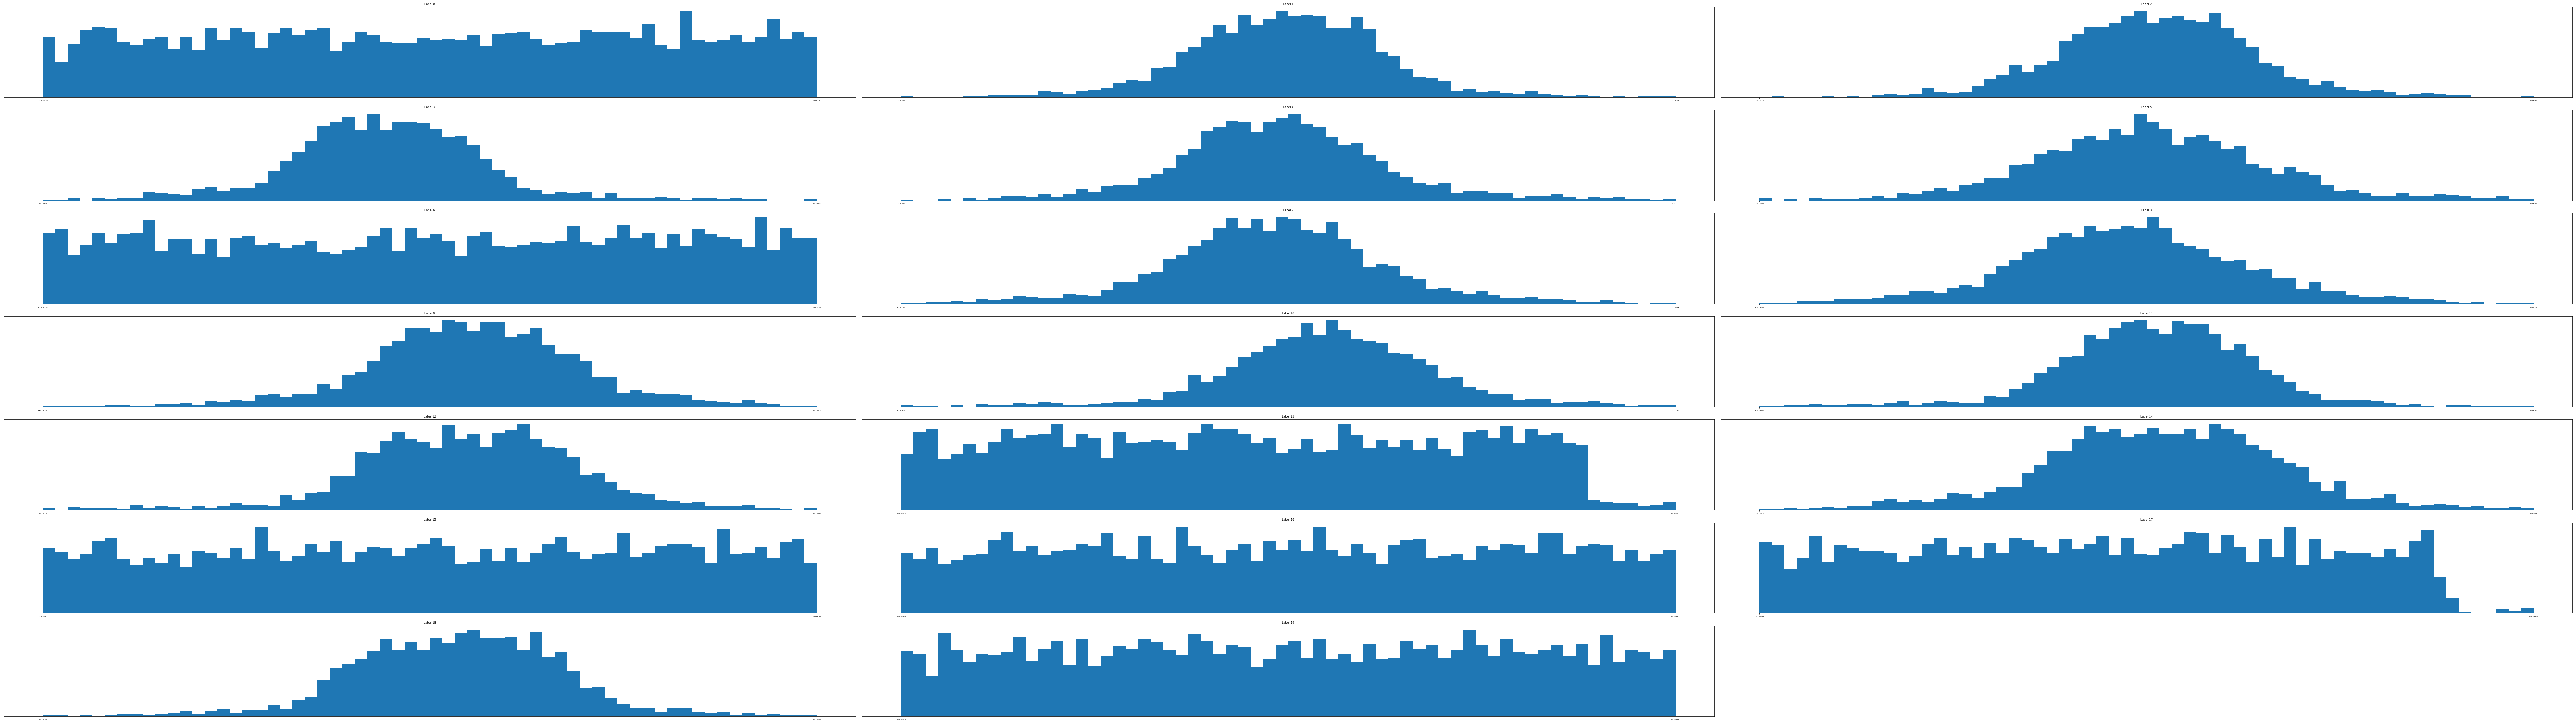

In [21]:
display_histograms(m1_weights, 20)

## CONFUSSION MATRIX

In [13]:
print(__doc__)

#import sklearn
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[  0  40   1 ...   0   0   0]
 [  0 576  53 ...   0   0   0]
 [  0  75 605 ...   0   0   0]
 ...
 [  0   0   0 ...  66   0   0]
 [  0   0   0 ...   1   0   0]
 [  0   1   1 ...   3   0   0]]


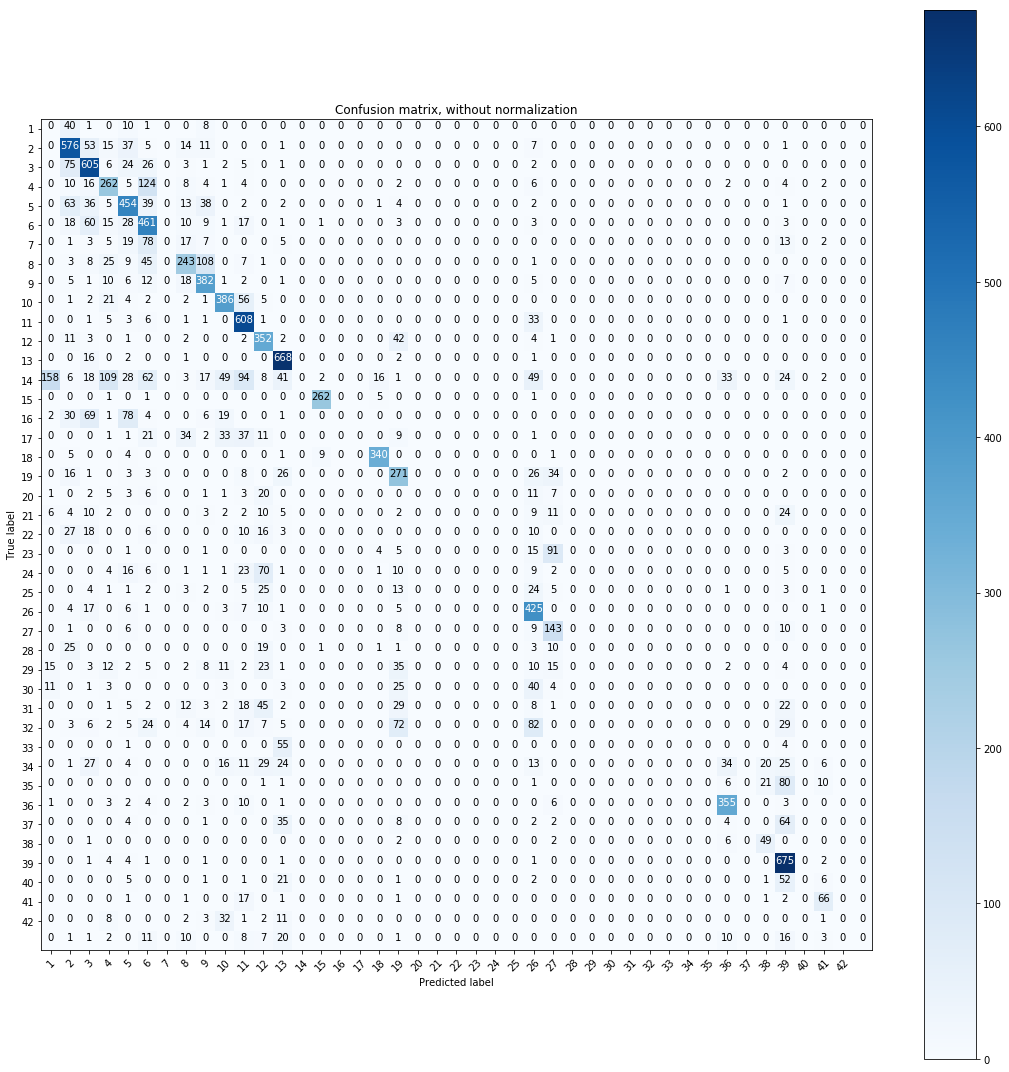

In [20]:
y_pred, _ = m1.session.run([m1.predicted_labels, m1.loss],
                                       {m1.images: X_test_orig, m1.labels:Y_test_orig})

y_test = Y_test_orig

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names= list(range(1,43))

#Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## PORCENTAJE DE ACIERTOS

In [21]:
def display_aciertos(images, titles=None, cols=5, interpolation=None):
    """ 
    images: A list of images. It can be either:
        + A list of Numpy arrays. Each array represents an image.
        + A list of lists of numpy arrays. In this casse, the images in the inner
          the inner lists are concatentated to make one image.
    
    """
    
    titles = titles or [""] * len(images)
    rows = math.ceil(len(images)/(cols))
    height_ratio =1.2*(rows/cols)*(0.5 if type(images[0]) is not np.ndarray else 1)
    plt.figure(figsize=(11,11 * height_ratio))
    i=1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.axis("off")
        if type(image) is not np.ndarray:
            image = [normalize(g) for g in image]
            image = np.concatenate(image, axis=1)
        else:
            image = normalize(image)
        plt.title(title, fontsize = 9)
        plt.imshow(image, cmap="Greys_r", interpolation=interpolation)
        i += 1

In [58]:
label_exemplars_test =[]
for i in range(43):
    for w in range(len(Y_test_orig)):
        if Y_test_orig[w] == i:
            label_exemplars_test.append(X_test_orig[w])
            break

In [53]:
label_count_test = []
for i in range(43):
    label_count_test.append(0)
    for w in range(len(Y_test_orig)):
        if Y_test_orig[w] == i:
            label_count_test[i] = label_count_test[i]+1

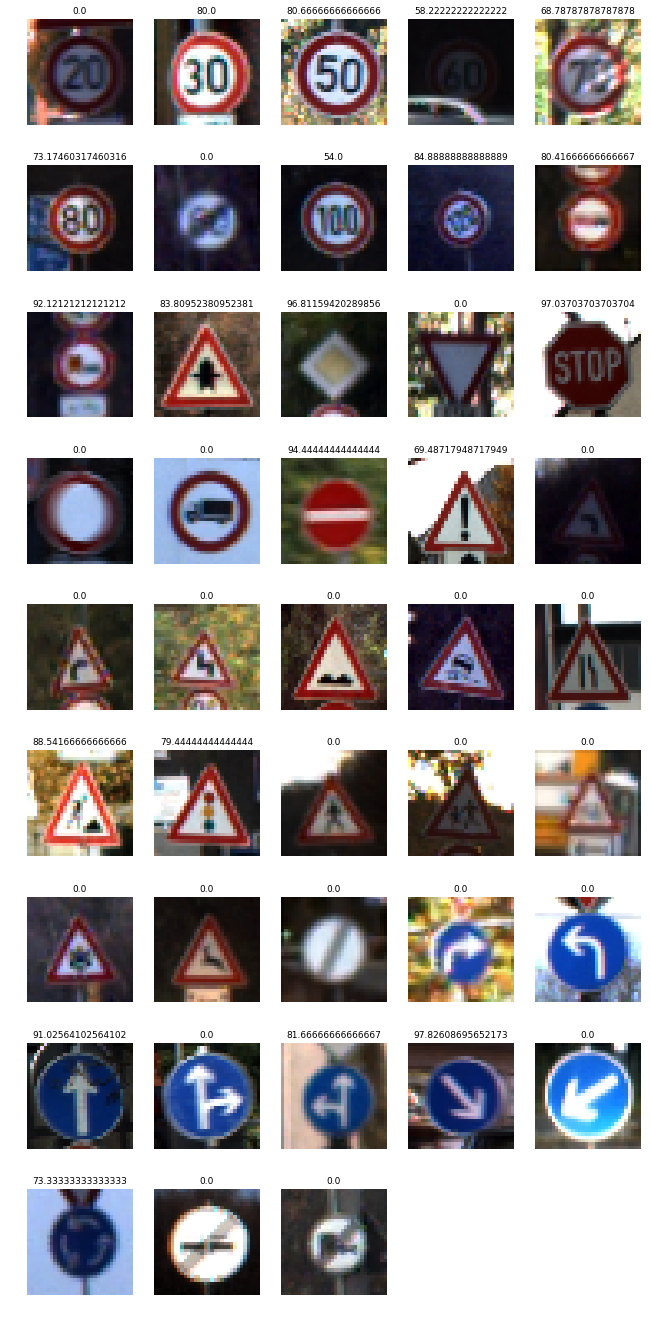

In [61]:
aciertos = [cnf_matrix[i,i]/label_count_test[i]*100 for i in range(43)]
display_aciertos(label_exemplars_test, aciertos)